In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
!pip install torch
!pip install pytorch_lightning
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.7 MB/s eta 0:00:00


In [ ]:
df    = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YMH_Clean_UCI_Power_Consumption_Dataset.csv")
cpi   = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YM_Clean_France_CPI_Electricity.csv")
temp  = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YMH_Clean_TempISD.csv")
cci   = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YM_Clean_CCI.csv")
gt1   = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YMW_Clean_GoogleTrends1.csv")
gt2   = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YMW_Clean_GoogleTrends2.csv")
gt3   = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YMW_Clean_GoogleTrends3.csv")


<ipython-input-4-968a71a3a344>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df    = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YMH_Clean_UCI_Power_Consumption_Dataset.csv")
<ipython-input-4-968a71a3a344>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  temp  = pd.read_csv("/content/drive/MyDrive/BDA696Project/Datasets/processsed/YMH_Clean_TempISD.csv")


In [ ]:
ISD = pd.read_csv('/content/drive/MyDrive/BDA696Project/TFT_Model_Datasets/ISD_cleaned.csv')
ISD['Date'] = pd.to_datetime(ISD['New_Date'])
ISD=ISD[['Date','Wind_Speed_Norm','Prec_Depth_Norm','Air_Temp_Norm']]
# ISD = ISD.drop_duplicates(subset='New_Date', keep='first')
# ISD.sort_values(by='New_Date', ascending = False)
# Wind_Speed_Agg = ISD.resample('D', on='New_Date').Wind_Speed_Norm.mean()
# Prec_Depth_Agg = ISD.resample('D', on='New_Date').Prec_Depth_Norm.mean()
# Air_Temp_Agg = ISD.resample('D', on='New_Date').Air_Temp_Norm.mean()

<ipython-input-5-a0624b3daacb>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  ISD = pd.read_csv('/content/drive/MyDrive/BDA696Project/TFT_Model_Datasets/ISD_cleaned.csv')


In [ ]:
# df    = pd.read_csv("Downloads/processsed/YMH_Clean_UCI_Power_Consumption_Dataset.csv")
# cpi   = pd.read_csv("Downloads/processsed/YM_Clean_France_CPI_Electricity.csv")
# temp  = pd.read_csv("Downloads/processsed/YMH_Clean_TempISD.csv")
# cci   = pd.read_csv("Downloads/processsed/YM_Clean_CCI.csv")
# gt1   = pd.read_csv("Downloads/processsed/YMW_Clean_GoogleTrends1.csv")
# gt2   = pd.read_csv("Downloads/processsed/YMW_Clean_GoogleTrends2.csv")
# gt3   = pd.read_csv("Downloads/processsed/YMW_Clean_GoogleTrends3.csv")


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.query('(Date.dt.hour==0 or Date.dt.hour==6 or Date.dt.hour==12 or Date.dt.hour==18) and Date.dt.minute==0')# or Date.dt.minute==30')
df=df.replace('?',0.0)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-01 00:00:00,00:00:00,2.580,0.136,241.970,10.600,0.000,0.000,0.0
360,2007-01-01 06:00:00,06:00:00,2.460,0.064,241.130,10.200,0.000,0.000,0.0
720,2007-01-01 12:00:00,12:00:00,2.478,0.000,235.300,10.400,0.000,0.000,0.0
1080,2007-01-01 18:00:00,18:00:00,1.416,0.000,239.130,5.800,0.000,0.000,17.0
1440,2007-01-02 00:00:00,00:00:00,0.442,0.122,241.060,1.800,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...
2051640,2010-11-25 18:00:00,18:00:00,1.756,0.068,237.1,7.4,0.0,0.0,0.0
2052000,2010-11-26 00:00:00,00:00:00,0.398,0.192,242.73,1.8,0.0,1.0,0.0
2052360,2010-11-26 06:00:00,06:00:00,0.324,0.078,243.72,1.4,0.0,0.0,0.0
2052720,2010-11-26 12:00:00,12:00:00,1.49,0.282,237.26,6.4,0.0,1.0,17.0


In [ ]:
def fillblanks(df_temp):
  temp = pd.DataFrame(pd.date_range(start=df_temp['Date'].min(), end= df_temp['Date'].max()),columns=['Date'])
  temp['Date'] = pd.to_datetime(temp['Date'])
  temp = temp.merge(df_temp, on='Date', how='left')
  temp = temp.replace(0, np.nan).ffill()
  return temp

In [ ]:
#temp['Date'] = pd.to_datetime(cci['Date'])
#df=pd.merge_asof(df,temp, on='Date')

#df.dtypes

cpi['Date'] = pd.to_datetime(cpi['Date'])
df=df.merge(fillblanks(cpi), on='Date', how='left')
df['CPI'] = df['CPI'].replace(0, np.nan).ffill()

cci['Date'] = pd.to_datetime(cci['Date'])
df=df.merge(fillblanks(cci), on='Date', how='left')
df['CCI'] = df['CCI'].replace(0, np.nan).ffill()

ISD['Date'] = pd.to_datetime(ISD['Date'])
df=df.merge(fillblanks(ISD), on='Date', how='left')
df['Wind_Speed_Norm'] = df['Wind_Speed_Norm'].replace(0, np.nan).ffill()
df['Prec_Depth_Norm'] = df['Prec_Depth_Norm'].replace(0, np.nan).ffill()
df['Air_Temp_Norm'] = df['Air_Temp_Norm'].replace(0, np.nan).ffill()


gt1['Date'] = pd.to_datetime(gt1['Date'])
df=df.merge(fillblanks(gt1), on='Date', how='left')
df['GT1_Hits'] = df['GT1_Hits'].replace(0, np.nan).ffill()


gt2['Date'] = pd.to_datetime(gt2['Date'])
df=df.merge(fillblanks(gt2), on='Date', how='left')
df['GT2_Hits'] = df['GT2_Hits'].replace(0, np.nan).ffill()


gt3['Date'] = pd.to_datetime(gt3['Date'])
df=df.merge(fillblanks(gt3), on='Date', how='left')
df['GT3_Hits'] = df['GT3_Hits'].replace(0, np.nan).ffill()



In [ ]:
df=df.fillna(value=0)

In [ ]:
!pip install lightning
!pip install pytorch_forecasting


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.8/155.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensi

In [ ]:

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

import optuna
from optuna.integration import PyTorchLightningPruningCallback


from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer, TorchNormalizer, MultiNormalizer,EncoderNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss



In [ ]:
earliest_time= df['Date'].min()

In [ ]:
df["day_of_week"] = df['Date'].dt.dayofweek.astype(str) # categories have be strings
df["week_of_year"] = df['Date'].dt.isocalendar().week.astype(str)  # categories have be strings
df["month"] = df['Date'].dt.month.astype(str)
df['hour'] = df['Date'].dt.hour.astype(str)
df['day'] = df['Date'].dt.day.astype(str)
df['year'] = df['Date'].dt.year-2006
df['year']=df['year'].astype('int')
#df['minute'] = df['Date'].dt.minute.astype(str).astype("int")
df['time_idx']=df.index
df['hours_from_start'] = (df['Date'] - earliest_time).dt.seconds / 60 / 60 + (df['Date'] - earliest_time).dt.days * 24
df['hours_from_start'] = df['hours_from_start'].astype('int')
df['days_from_start'] = (df['Date'] - earliest_time).dt.days
df['group']=0
df['Global_active_power']=df['Global_active_power'].astype("float64")
df['Voltage']=df['Voltage'].astype("float64")
df['Global_intensity']=df['Global_intensity'].astype("float64")
df['Sub_metering_1']=df['Sub_metering_1'].astype("float64")
df['Sub_metering_2']=df['Sub_metering_2'].astype("float64")
df['Wind_Speed_Norm'] = df['Wind_Speed_Norm'].astype("float64")
df['Prec_Depth_Norm'] = df['Prec_Depth_Norm'].astype("float64")
df['Air_Temp_Norm'] = df['Air_Temp_Norm'].astype("float64")


time_df = df[[
    'Global_active_power'
    ,'Sub_metering_1'
    ,'Sub_metering_2'
    ,'Sub_metering_3'
,'CPI'
,'CCI'
,'GT1_Hits'
,'GT2_Hits'
,'GT3_Hits'
,'Wind_Speed_Norm'
,'Prec_Depth_Norm'
,'Air_Temp_Norm'
,'day_of_week'
,'week_of_year'
,'year'
,'month'
,'hour'
,'day'
,'time_idx'
,'days_from_start'
,'group'
]]
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power            object
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
CPI                             float64
CCI                             float64
Wind_Speed_Norm                 float64
Prec_Depth_Norm                 float64
Air_Temp_Norm                   float64
GT1_Hits                        float64
GT2_Hits                        float64
GT3_Hits                        float64
day_of_week                      object
week_of_year                     object
month                            object
hour                             object
day                              object
year                              int64
time_idx                          int64
hours_from_start                  int64


In [ ]:
time_df.isna().values.sum()


0

In [ ]:
time_df

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,CPI,CCI,GT1_Hits,GT2_Hits,GT3_Hits,Wind_Speed_Norm,...,Air_Temp_Norm,day_of_week,week_of_year,year,month,hour,day,time_idx,days_from_start,group
0,2.580,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,0,1,0,0,0
1,2.460,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,6,1,1,0,0
2,2.478,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,12,1,2,0,0
3,1.416,0.0,0.0,17.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,18,1,3,0,0
4,0.442,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.277778,...,-0.488636,1,1,1,1,0,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,1.756,0.0,0.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,3,47,4,11,18,25,5699,1424,0
5700,0.398,0.0,1.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,4,47,4,11,0,26,5700,1425,0
5701,0.324,0.0,0.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,4,47,4,11,6,26,5701,1425,0
5702,1.490,0.0,1.0,17.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,4,47,4,11,12,26,5702,1425,0


In [ ]:
#Hyperparameters
#batch size=64
#number heads=4, hidden sizes=160, lr=0.001, gr_clip=0.1

max_prediction_length = 4*7*4*6 #sixmonths
max_encoder_length = 4*365 #one year
training_cutoff = time_df["time_idx"].max() - max_prediction_length

Power_Normalizer = TorchNormalizer()
Power_Normalizer.fit(time_df[lambda x: x.time_idx <= training_cutoff]['Global_active_power'])

Sub1_Normalizer = TorchNormalizer()
Sub1_Normalizer.fit(time_df[lambda x: x.time_idx <= training_cutoff]['Sub_metering_1'])

Sub2_Normalizer = TorchNormalizer()
Sub2_Normalizer.fit(time_df[lambda x: x.time_idx <= training_cutoff]['Sub_metering_2'])

Sub3_Normalizer = TorchNormalizer()
Sub3_Normalizer.fit(time_df[lambda x: x.time_idx <= training_cutoff]['Sub_metering_3'])



training = TimeSeriesDataSet(
    time_df[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target=["Global_active_power", 'Sub_metering_1','Sub_metering_2','Sub_metering_3'],
    group_ids=['group'],
    min_encoder_length=4*7, #one week
    max_encoder_length=max_encoder_length,
    min_prediction_length=4, #one day
    max_prediction_length=max_prediction_length,
    #static_categoricals=["consumer_id"],
    time_varying_known_categoricals=["day","day_of_week", "month", 'hour'], #year to be added
    time_varying_known_reals=["time_idx",'year'],
    time_varying_unknown_reals=['CPI','CCI','GT1_Hits','GT2_Hits','GT3_Hits','Wind_Speed_Norm','Prec_Depth_Norm','Air_Temp_Norm'], #temp to be added # we normalize by group
    add_relative_time_idx=True,
    target_normalizer=MultiNormalizer([Power_Normalizer, Sub1_Normalizer, Sub2_Normalizer, Sub3_Normalizer]),
    add_target_scales=True,
    add_encoder_length=True,
    #add_nan=True,
    allow_missing_timesteps=True
)



validation = TimeSeriesDataSet.from_dataset(training, time_df, predict=True, stop_randomization=True)

# create dataloaders for  our model
batch_size = 64
# if you have a strong GPU, feel free to increase the number of workers
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=8)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=8)

In [ ]:


early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=5, verbose=True, mode="min")
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger("lightning_logs")

trainer = pl.Trainer(
    max_epochs=30,
    accelerator='auto',
    devices=1,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    callbacks=[lr_logger, early_stop_callback],
    logger=logger
    )




tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.01,
    hidden_size=16,
    attention_head_size=8,
    dropout=1,
    hidden_continuous_size=16,
    output_size=[7,7,7,7],  # there are 7 quantiles by default: [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4)



INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperp

In [ ]:
# # Hyperparameters Tuning with Optuna
# # create study
# import pickle

# study = optimize_hyperparameters(
#     train_dataloader,
#     val_dataloader,
#     model_path="optuna_test",
#     n_trials=64,
#     max_epochs=25,
#     gradient_clip_val_range=(0.01, 1.0),
#     hidden_size_range=(8, 128),
#     hidden_continuous_size_range=(8, 128),
#     attention_head_size_range=(1, 4),
#     learning_rate_range=(0.001, 0.1),
#     dropout_range=(0.1, 0.3),
#     trainer_kwargs=dict(limit_train_batches=51),
#     reduce_on_plateau_patience=4,
#     use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
# )

# # pickle study results
# with open("study.pkl", "wb") as fout:
#     pickle.dump(study, fout)

# # show best hyperparameters
# study.best_trial.params

[I 2023-12-10 07:14:28,911] Trial 3 finished with value: 0.31155362725257874 and parameters: {'gradient_clip_val': 0.8223697202530604, 'hidden_size': 22, 'dropout': 0.2972505585187706, 'hidden_continuous_size': 9, 'attention_head_size': 1, 'learning_rate': 0.014035308702029799}. Best is trial 2 with value: 0.29049456119537354.


In [ ]:
#hyperparameter optimised

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.01,
    hidden_size=128,
    attention_head_size=4,
    dropout=0.2972505585187706,
    hidden_continuous_size=128,
    output_size=[7,7,7,7],  # there are 7 quantiles by default: [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4)


In [ ]:
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | MultiLoss                       | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 460   
3  | prescalers                         | ModuleDict                      | 5.1 K 
4  | static_variable_selection          | VariableSelectionNetwork        | 609 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 757 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 205 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 66.3 K
8  | static_context_initia

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved. New best score: 4.259
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved. New best score: 4.259


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.134 >= min_delta = 0.0001. New best score: 4.125
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.134 >= min_delta = 0.0001. New best score: 4.125


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.044 >= min_delta = 0.0001. New best score: 4.082
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.044 >= min_delta = 0.0001. New best score: 4.082


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 4.078
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 4.078


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.070 >= min_delta = 0.0001. New best score: 4.009
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.070 >= min_delta = 0.0001. New best score: 4.009


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.058 >= min_delta = 0.0001. New best score: 3.951
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.058 >= min_delta = 0.0001. New best score: 3.951


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.085 >= min_delta = 0.0001. New best score: 3.866
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.085 >= min_delta = 0.0001. New best score: 3.866


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 5 records. Best score: 3.866. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 5 records. Best score: 3.866. Signaling Trainer to stop.


#Saving the Model

In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
print(best_model_path)
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

lightning_logs/lightning_logs/version_0/checkpoints/epoch=12-step=1430.ckpt


In [ ]:
!zip  -r /content/drive/MyDrive/model.zip lightning_logs/lightning_logs/version_0/*

updating: lightning_logs/lightning_logs/version_0/hparams.yaml (deflated 90%)
  adding: lightning_logs/lightning_logs/version_0/01430/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/month/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/month/tensors.tsv (deflated 50%)
  adding: lightning_logs/lightning_logs/version_0/01430/month/metadata.tsv (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/day_of_week/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/day_of_week/tensors.tsv (deflated 49%)
  adding: lightning_logs/lightning_logs/version_0/01430/day_of_week/metadata.tsv (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/hour/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/hour/tensors.tsv (deflated 43%)
  adding: lightning_logs/lightning_logs/version_0/01430/hour/metadata.tsv (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/day/ (stored 0%)
  adding: li

In [ ]:
!zip  -r /content/drive/MyDrive/BDA 696 Project/Model/model.zip lightning_logs/lightning_logs/version_0/*

	zip warning: name not matched: 696
	zip warning: name not matched: Project/Model/model.zip
updating: lightning_logs/lightning_logs/version_0/hparams.yaml (deflated 90%)
  adding: lightning_logs/lightning_logs/version_0/01430/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/month/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/month/tensors.tsv (deflated 50%)
  adding: lightning_logs/lightning_logs/version_0/01430/month/metadata.tsv (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/day_of_week/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/day_of_week/tensors.tsv (deflated 49%)
  adding: lightning_logs/lightning_logs/version_0/01430/day_of_week/metadata.tsv (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/hour/ (stored 0%)
  adding: lightning_logs/lightning_logs/version_0/01430/hour/tensors.tsv (deflated 43%)
  adding: lightning_logs/lightning_logs/version_0/01430/hour/metadata.tsv (stor

In [ ]:
path = "/content/drive/MyDrive/BDA 696 Project/Model/model.zip"

#torch.save(best_tft.state_dict(), path)


In [ ]:
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
#Take a look at what the raw_predictions variable contains

raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)
print(raw_predictions._fields)
#('output', 'x', 'index', 'decoder_lengths', 'y')

print('\n')
print(raw_predictions.output._fields)
# ('prediction',
# 'encoder_attention',
# 'decoder_attention',
# 'static_variables',
# 'encoder_variables',
# 'decoder_variables',
# 'decoder_lengths',
# 'encoder_lengths')

print('\n')
print(raw_predictions.output.prediction)
#torch.Size([5, 24, 7])

# We get predictions of 5 time-series for 24 days.
# For each day we get 7 predictions - these are the 7 quantiles:
#[0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
# We are mostly interested in the 4th quantile which represents, let's say, the 'median loss'
# fyi, although docs use the term quantiles, the most accurate term are percentiles

# We get predictions of 5 time-series for 24 days.
# For each day we get 7 predictions - these are the 7 quantiles:
#[0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
# We are mostly interested in the 4th quantile which represents, let's say, the 'median loss'
# fyi, although docs use the term quantiles, the most accurate term are percentiles

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


('output', 'x', 'index', 'decoder_lengths', 'y')


('prediction', 'encoder_attention', 'decoder_attention', 'static_variables', 'encoder_variables', 'decoder_variables', 'decoder_lengths', 'encoder_lengths')


[tensor([[[0.1022, 0.2514, 0.3353,  ..., 0.6704, 1.1878, 2.3220],
         [0.0762, 0.2296, 0.2955,  ..., 0.4236, 1.0640, 1.8717],
         [0.4332, 1.3797, 1.4637,  ..., 1.8752, 1.7920, 2.9931],
         ...,
         [0.1061, 0.1890, 0.2604,  ..., 0.4142, 1.1052, 1.7612],
         [0.4922, 1.3680, 1.4696,  ..., 1.7980, 1.8556, 2.6247],
         [0.1301, 0.2659, 0.4748,  ..., 1.3267, 1.7201, 2.7271]]],
       device='cuda:0'), tensor([[[-0.0509, -0.1544,  0.0533,  ..., -0.0455,  0.0707,  1.0354],
         [-0.0806, -0.1441,  0.0651,  ..., -0.0696,  0.0560,  0.7458],
         [-0.2429, -0.6902,  0.1333,  ..., -0.0877,  0.6694,  2.8159],
         ...,
         [-0.0304, -0.0950,  0.0405,  ..., -0.0167, -0.0399,  0.6095],
         [-0.1026, -0.7039,  0.0776,  ..., -0.0345,  0.3317,

#Observed vs Predicted

[<Figure size 1000x500 with 5 Axes>,
 <Figure size 1000x500 with 5 Axes>,
 <Figure size 1000x500 with 5 Axes>,
 <Figure size 1000x500 with 5 Axes>]

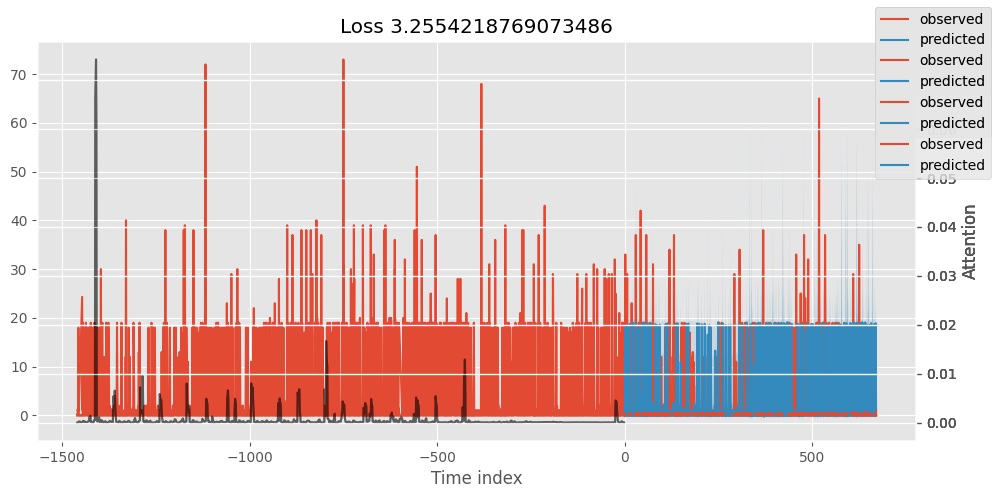

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 5))
best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=0,show_future_observed=True, add_loss_to_title=QuantileLoss(),ax=ax)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


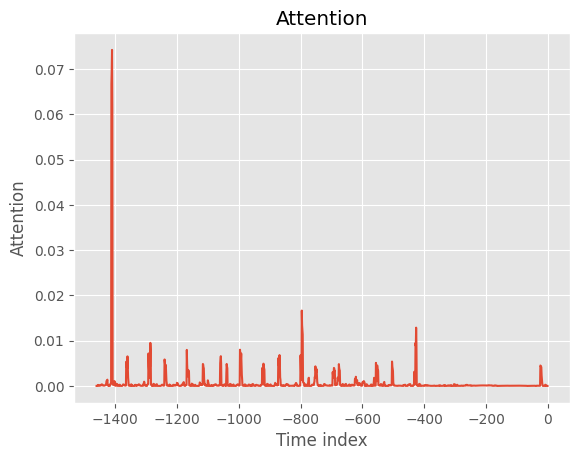

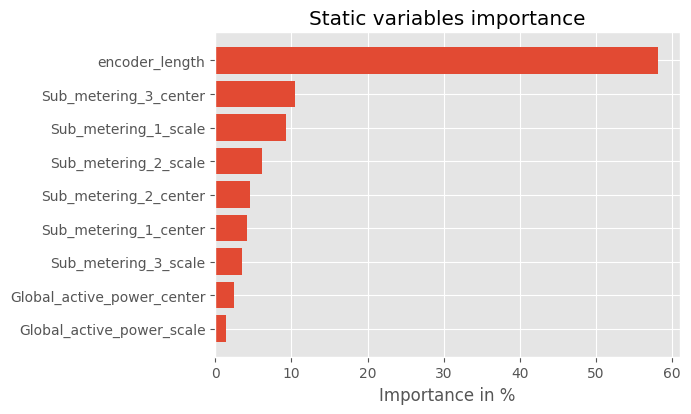

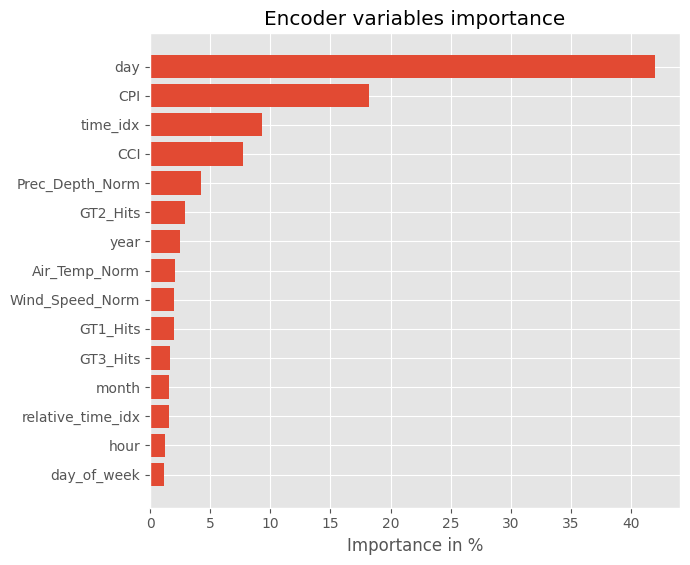

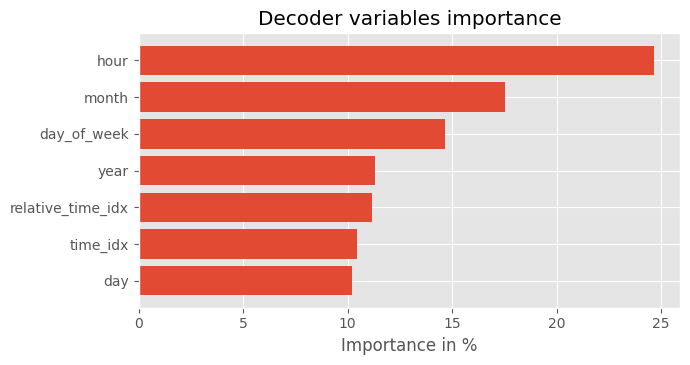

In [ ]:
raw_predictions= best_tft.predict(val_dataloader, mode="raw", return_x=True)
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
#interpretation
plt.show(best_tft.plot_interpretation(interpretation))


#Future Predictions

In [ ]:
#encoder data is the last lookback window: we get the last 1 week (168 datapoints) for all 5 consumers = 840 total datapoints

encoder_data = time_df
#decoder_data is the new dataframe for which we will create predictions.
#decoder_data df should be max_prediction_length*consumers = 24*5=120 datapoints long : 24 datapoints for each cosnumer
#we create it by repeating the last hourly observation of every consumer 24 times since we do not really have new test data
#and later we fix the columns
encoder_data



,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,CPI,CCI,GT1_Hits,GT2_Hits,GT3_Hits,Wind_Speed_Norm,...,Air_Temp_Norm,day_of_week,week_of_year,year,month,hour,day,time_idx,days_from_start,group
0,2.580,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,0,1,0,0,0
1,2.460,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,6,1,1,0,0
2,2.478,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,12,1,2,0,0
3,1.416,0.0,0.0,17.0,72.71,100.0,45.0,41.0,0.0,1.583333,...,-0.056818,0,1,1,1,18,1,3,0,0
4,0.442,0.0,0.0,0.0,72.71,100.0,45.0,41.0,0.0,1.277778,...,-0.488636,1,1,1,1,0,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,1.756,0.0,0.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,3,47,4,11,18,25,5699,1424,0
5700,0.398,0.0,1.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,4,47,4,11,0,26,5700,1425,0
5701,0.324,0.0,0.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,4,47,4,11,6,26,5701,1425,0
5702,1.490,0.0,1.0,17.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,-0.488636,4,47,4,11,12,26,5702,1425,0


In [ ]:
decoder_data = pd.DataFrame(pd.date_range(start='2010-11-27 00:00:00', end= '2011-11-27 00:00:00',periods=(365*4)+1),columns=['Date'])
decoder_data['Date'] = pd.to_datetime(decoder_data['Date'])
decoder_data['time_idx']=pd.Series(range(5704,((365*4)+5705)))
decoder_data

,Date,time_idx
0,2010-11-27 00:00:00,5704
1,2010-11-27 06:00:00,5705
2,2010-11-27 12:00:00,5706
3,2010-11-27 18:00:00,5707
4,2010-11-28 00:00:00,5708
...,...,...
1456,2011-11-26 00:00:00,7160
1457,2011-11-26 06:00:00,7161
1458,2011-11-26 12:00:00,7162
1459,2011-11-26 18:00:00,7163


In [ ]:
decoder_data['time_idx']=decoder_data['time_idx'].astype(np.int64)
#fix the new columns ["day","day_of_week", "month", 'hour','year']
decoder_data["year"] = decoder_data["Date"].dt.year.astype(np.int64)
decoder_data['year'] = decoder_data['year']-2006
decoder_data["month"] = decoder_data["Date"].dt.month.astype(np.int64)
decoder_data["hour"] = decoder_data["Date"].dt.hour.astype(np.int64)
decoder_data["day"] = decoder_data["Date"].dt.day.astype(np.int64)
decoder_data["day_of_week"] = decoder_data["Date"].dt.dayofweek.astype(np.int64)
decoder_data["week_of_year"] = decoder_data['Date'].dt.isocalendar().week.astype(np.int64)  # categories have be strings

decoder_data.dtypes

Date            datetime64[ns]
time_idx                 int64
year                     int64
month                    int64
hour                     int64
day                      int64
day_of_week              int64
week_of_year             int64
dtype: object

In [ ]:
new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index=True)
new_prediction_data[['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3'
,'CPI'
,'CCI'
,'GT1_Hits'
,'GT2_Hits'
,'GT3_Hits'
,'Wind_Speed_Norm'
,'Prec_Depth_Norm'
,'Air_Temp_Norm'
,'days_from_start'
,'group']]=new_prediction_data[['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3'
,'CPI'
,'CCI'
,'GT1_Hits'
,'GT2_Hits'
,'GT3_Hits'
,'Wind_Speed_Norm'
,'Prec_Depth_Norm'
,'Air_Temp_Norm'
,'days_from_start'
,'group']].ffill()
#new_prediction_data["year"] = new_prediction_data["year"].astype(str)
new_prediction_data["month"] = new_prediction_data["month"].astype(str)
new_prediction_data["hour"] = new_prediction_data["hour"].astype(str)
new_prediction_data["day"] = new_prediction_data["day"].astype(str)
new_prediction_data["day_of_week"] = new_prediction_data["day_of_week"].astype(str)
new_prediction_data["week_of_year"] = new_prediction_data["week_of_year"].astype(str)

new_prediction_data.query('time_idx >=5702 and time_idx<=5705')

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,CPI,CCI,GT1_Hits,GT2_Hits,GT3_Hits,Wind_Speed_Norm,...,day_of_week,week_of_year,year,month,hour,day,time_idx,days_from_start,group,Date
5702,1.490,0.0,1.0,17.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,4,47,4,11,12,26,5702,1425.0,0.0,NaT
5703,1.096,0.0,0.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,4,47,4,11,18,26,5703,1425.0,0.0,NaT
5704,1.096,0.0,0.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,5,47,4,11,0,27,5704,1425.0,0.0,2010-11-27 00:00:00
5705,1.096,0.0,0.0,0.0,84.54,94.0,56.0,26.0,26.0,-0.416667,...,5,47,4,11,6,27,5705,1425.0,0.0,2010-11-27 06:00:00


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


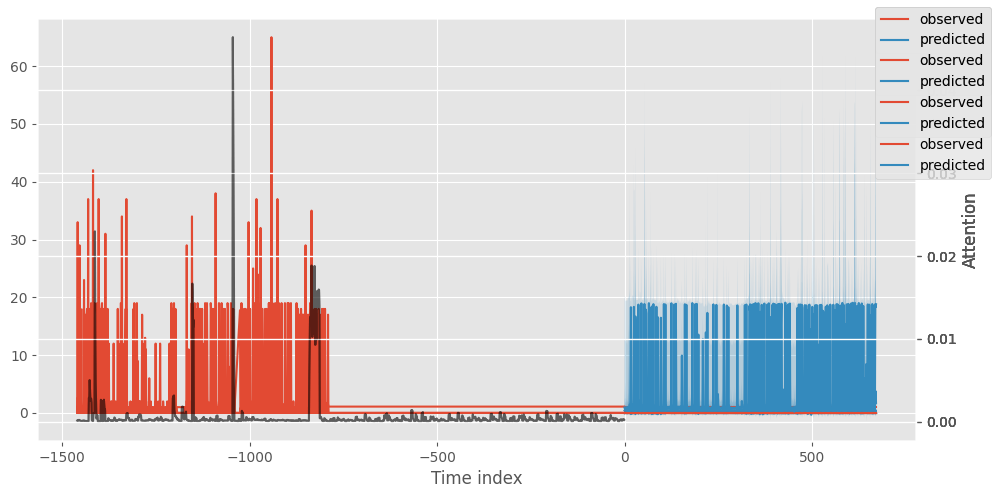

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
#create out-of-sample predictions for MT_002
#new_prediction_data=new_prediction_data.query(" consumer_id == 'MT_002'")
new_raw_predictions = best_tft.predict(new_prediction_data, mode="raw", return_x=True)
best_tft.plot_prediction(new_raw_predictions.x, new_raw_predictions.output, show_future_observed=True, idx=0, ax=ax);

#Baseline vs TFT

In [ ]:
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)]).to("cuda")
baseline_predictions = Baseline().predict(val_dataloader)
baseline_predictions.tolist()

TypeError: ignored

In [ ]:
listm=actuals.tolist()[0]
import statistics
# Calculate middle values
print(statistics.mean(listm))

In [ ]:
plt.plot(actuals.tolist()[0],baseline_predictions.tolist()[0])

#Loss Comparision (Random Walk Vs TFT)

In [ ]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)]).to('cuda')
predictions = best_tft.predict(val_dataloader)

#average p50 loss overall
print((actuals - predictions).abs().mean().item())
#average p50 loss per time series
print((actuals - predictions).abs().mean(axis=1))

#6.067104816436768
#tensor([ 1.0064,  6.8266,  2.1732,  8.3614, 11.9679], device='cuda:0')

In [ ]:
listm=actuals.tolist()[0]
def mse_loss(y_pred, y_true):
    """
    Calculates the mean squared error (MSE) loss between predicted and true values.

    Args:
    - y_pred: predicted values
    - y_true: true values

    Returns:
    - mse_loss: mean squared error loss
    """
    n = len(y_true)
    mse_loss = np.sum((y_pred - y_true) ** 2) / n
    return mse_loss

def mape_loss(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE) between two arrays.

    Parameters:
    - y_true (numpy array): Actual values.
    - y_pred (numpy array): Predicted values.

    Returns:
    - float: Mean Absolute Percentage Error (MAPE).
    """
    # Ensure that arrays are not empty and have the same length
    if len(y_true) == 0 or len(y_true) != len(y_pred):
        raise ValueError("Input arrays must not be empty and must have the same length.")

    # Calculate absolute percentage error for each element
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)

    # Replace any inf or nan values with zero
    absolute_percentage_error[np.isinf(absolute_percentage_error) | np.isnan(absolute_percentage_error)] = 0

    # Calculate mean absolute percentage error
    mape = np.mean(absolute_percentage_error) * 100

    return mape


#Generate 5 random numbers between 10 and 30
randomlist = np.random.uniform(low=0.0, high=2.0, size=672)
#randomlist
print(mse_loss(listm,randomlist))

plt.plot(listm)
plt.plot(randomlist)

In [ ]:
new_raw_predictions = best_tft.predict(new_prediction_data, return_x=True, return_y=True)

In [ ]:
pred_y = new_raw_predictions.output.cpu().numpy()
pred_y = pred_y[0]
pred_y

In [ ]:
y_actual = new_prediction_data['Global_active_power'][-672:]

In [ ]:
print(mape_loss(y_actual,pred_y))
print(mape_loss(listm,randomlist))


